In [ ]:
# To ease the process of evaluating RCA, we create a subset without masks or landmarks
# Purely by selecting the first three columns of the annotations, to use less memory

import os
import pandas as pd 

folder = '../../Annotations'
out = '../../RCA'

for f in os.listdir(folder):
    print(f)    
    
    df = pd.read_csv(os.path.join(folder, f))
      
    # the subset of the DF are the first three columns, ignoring the index
    df = df.iloc[:, 1:4]
    
    # save subset including _RCA in the name
    df.to_csv(os.path.join(out, f), index=False)
    
    del df
    

In [1]:
import os
import pandas as pd 

path = '../../../RCA'

dfs = []
names = []

for f in sorted(os.listdir(path)):
    if '.csv' not in f:
        continue
    if 'CANDID' in f:
        continue
    df = pd.read_csv(os.path.join(path, f))
    
    dfs.append(df)
    names.append(f)

In [2]:
def compute_statistics(df, metric_description):
    # Compute statistics for each metric
    stats = {}
    for metric in metrics:
        stats[metric] = {
            'Sample size (N)': df[metric].count(),
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Std': df[metric].std(),
            'Min': df[metric].min(),
            '1%': df[metric].quantile(0.01),
            '5%': df[metric].quantile(0.05),
            '25%': df[metric].quantile(0.25),
            '50%': df[metric].quantile(0.5),
            '75%': df[metric].quantile(0.75),
            'Max': df[metric].max(),
        }

    # Convert the dictionary to a pandas DataFrame
    stats_df = pd.DataFrame(stats)

    return stats_df

metrics = ['Dice RCA (Max)', 'Dice RCA (Mean)']
stats_dfs = []
    
for df, name in zip(dfs, names):
    stats_df = compute_statistics(df, metrics).T
    stats_df['Dataset name'] = name.replace('.csv', '')
    # move name to the front
    stats_df = stats_df.set_index('Dataset name').reset_index()
    stats_dfs.append(stats_df)
    
stats_all = pd.concat(stats_dfs)

In [3]:
display(stats_all)

,Dataset name,Sample size (N),Metric,Mean,Std,Min,1%,5%,25%,50%,75%,Max
0,CheXpert,187825,Dice RCA (Max),0.869592,0.03769,0.415286,0.757333,0.801078,0.848712,0.875078,0.896421,0.961045
1,CheXpert,187825,Dice RCA (Mean),0.82996,0.03828,0.399789,0.717734,0.76107,0.808336,0.835069,0.857341,0.918499
0,ChestX-ray8,112120,Dice RCA (Max),0.881635,0.043796,0.16387,0.731636,0.805643,0.864123,0.890268,0.909464,0.967235
1,ChestX-ray8,112120,Dice RCA (Mean),0.840756,0.043672,0.147679,0.691469,0.763548,0.823289,0.849996,0.868816,0.925489
0,MIMIC-CXR-JPG,243334,Dice RCA (Max),0.872732,0.049586,0.179348,0.689954,0.783854,0.854463,0.883627,0.904249,0.967694
1,MIMIC-CXR-JPG,243334,Dice RCA (Mean),0.83065,0.050704,0.149124,0.649658,0.737618,0.810583,0.842107,0.863962,0.920812
0,Padchest,96184,Dice RCA (Max),0.893404,0.041801,0.127504,0.714326,0.831394,0.88177,0.901382,0.916734,0.969965
1,Padchest,96184,Dice RCA (Mean),0.85065,0.041662,0.103377,0.672375,0.789718,0.837728,0.85839,0.874314,0.926617
0,VinDr-CXR,18000,Dice RCA (Max),0.892036,0.034712,0.500902,0.778127,0.831468,0.875919,0.897729,0.91491,0.963501
1,VinDr-CXR,18000,Dice RCA (Mean),0.850124,0.032791,0.469268,0.738086,0.794216,0.834887,0.855277,0.871848,0.918513


In [4]:
stats_all[stats_all['Metric'] == 'Dice RCA (Mean)'].drop(columns=['Metric'])

,Dataset name,Sample size (N),Mean,Std,Min,1%,5%,25%,50%,75%,Max
1,CheXpert,187825,0.82996,0.03828,0.399789,0.717734,0.76107,0.808336,0.835069,0.857341,0.918499
1,ChestX-ray8,112120,0.840756,0.043672,0.147679,0.691469,0.763548,0.823289,0.849996,0.868816,0.925489
1,MIMIC-CXR-JPG,243334,0.83065,0.050704,0.149124,0.649658,0.737618,0.810583,0.842107,0.863962,0.920812
1,Padchest,96184,0.85065,0.041662,0.103377,0.672375,0.789718,0.837728,0.85839,0.874314,0.926617
1,VinDr-CXR,18000,0.850124,0.032791,0.469268,0.738086,0.794216,0.834887,0.855277,0.871848,0.918513


In [5]:
stats_all[stats_all['Metric'] == 'Dice RCA (Max)'].drop(columns=['Metric'])

,Dataset name,Sample size (N),Mean,Std,Min,1%,5%,25%,50%,75%,Max
0,CheXpert,187825,0.869592,0.03769,0.415286,0.757333,0.801078,0.848712,0.875078,0.896421,0.961045
0,ChestX-ray8,112120,0.881635,0.043796,0.16387,0.731636,0.805643,0.864123,0.890268,0.909464,0.967235
0,MIMIC-CXR-JPG,243334,0.872732,0.049586,0.179348,0.689954,0.783854,0.854463,0.883627,0.904249,0.967694
0,Padchest,96184,0.893404,0.041801,0.127504,0.714326,0.831394,0.88177,0.901382,0.916734,0.969965
0,VinDr-CXR,18000,0.892036,0.034712,0.500902,0.778127,0.831468,0.875919,0.897729,0.91491,0.963501


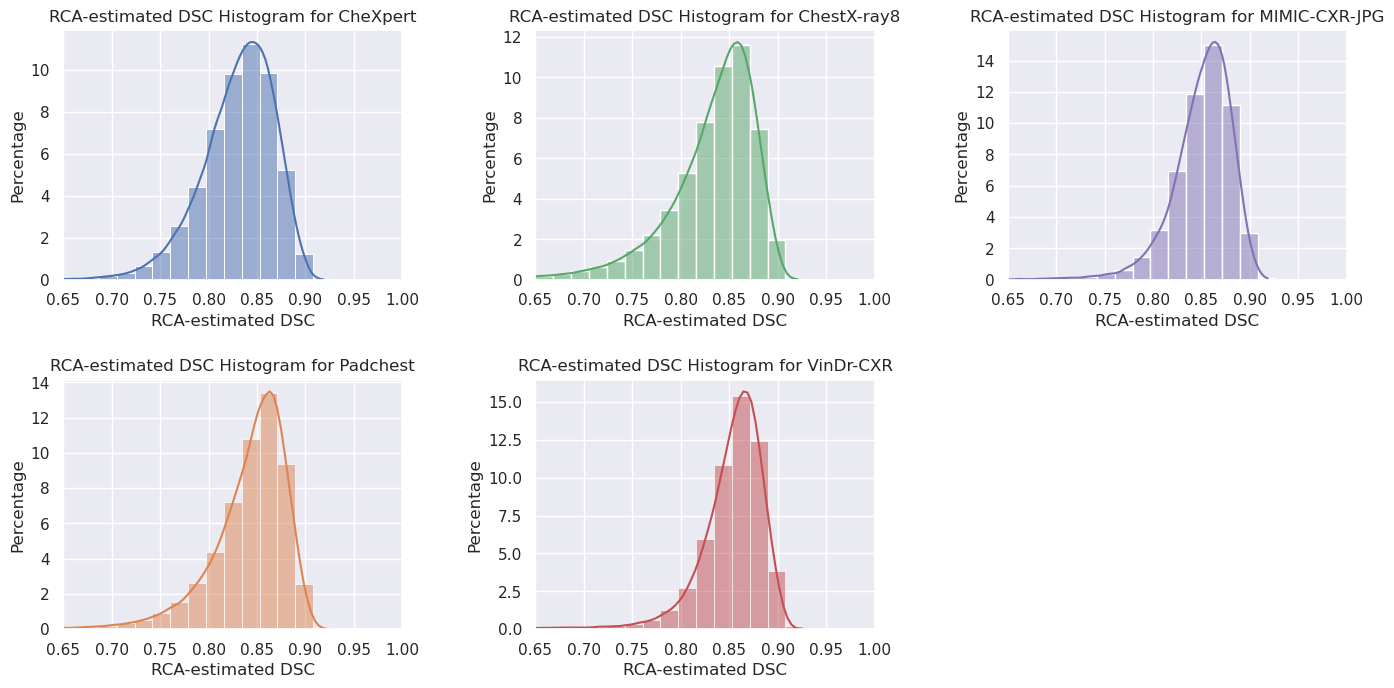

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

def plot_individual_histograms(dfs, names, metric):
    # Set the theme for seaborn plots
    sns.set_theme(style='darkgrid')

    # Create the subplot grid
    if len(dfs) % 2 == 0:
        fig, axes = plt.subplots(2, len(dfs) // 2, figsize=(len(dfs)*3, 8))
    else:
        fig, axes = plt.subplots(2, len(dfs) // 2 + 1, figsize=(len(dfs)*3, 8))
    fig.tight_layout(pad=5)

    # Iterate through the datasets and plot the histograms for Dice_RCA_Max and Dice_RCA_Mean
    for i, (df, name) in enumerate(zip(dfs, names)):
        values = df[metric]
        
        bins = np.linspace(0.65, 1.0, 20)

        # Plot Max histogram
        sns.histplot(data=values, kde=True, bins=bins, ax=axes[i%2, i//2], stat='density', color=sns.color_palette()[i], label=name)
        axes[i//3, i%3].set_title("RCA-estimated DSC Histogram for " + name.replace('.csv', ''))
        axes[i//3, i%3].set_xlabel("RCA-estimated DSC")
        axes[i//3, i%3].set_ylabel('Percentage')
        axes[i//3, i%3].set_xlim([0.65, 1.0])
        
    # Remove everything from the unused subplots
    for i in range(len(dfs), len(axes.flat)):
        axes.flatten()[i].remove()

    # Add a title for the entire figure
    # plt.suptitle("RCA-estimated DSC histogram for all datasets", fontsize=16)
    
    #if "Max" in metric:    
    #    plt.suptitle("RCA-estimated DSC histogram for all datasets using the max value", fontsize=16)
    #else:    
    #    plt.suptitle("RCA-estimated DSC histogram for all datasets", fontsize=16)
        
    # Reduce the space between the subplots
    plt.subplots_adjust(hspace=0.4)
    
    savename='histograms_%s.png'%metric
    savename=savename.replace(' ', '_').replace('(', '').replace(')', '')
    plt.savefig(savename, dpi=300, bbox_inches='tight')
    plt.savefig(savename.replace('.png','.pdf'), dpi=300, bbox_inches='tight')


plot_individual_histograms(dfs, names, 'Dice RCA (Mean)')

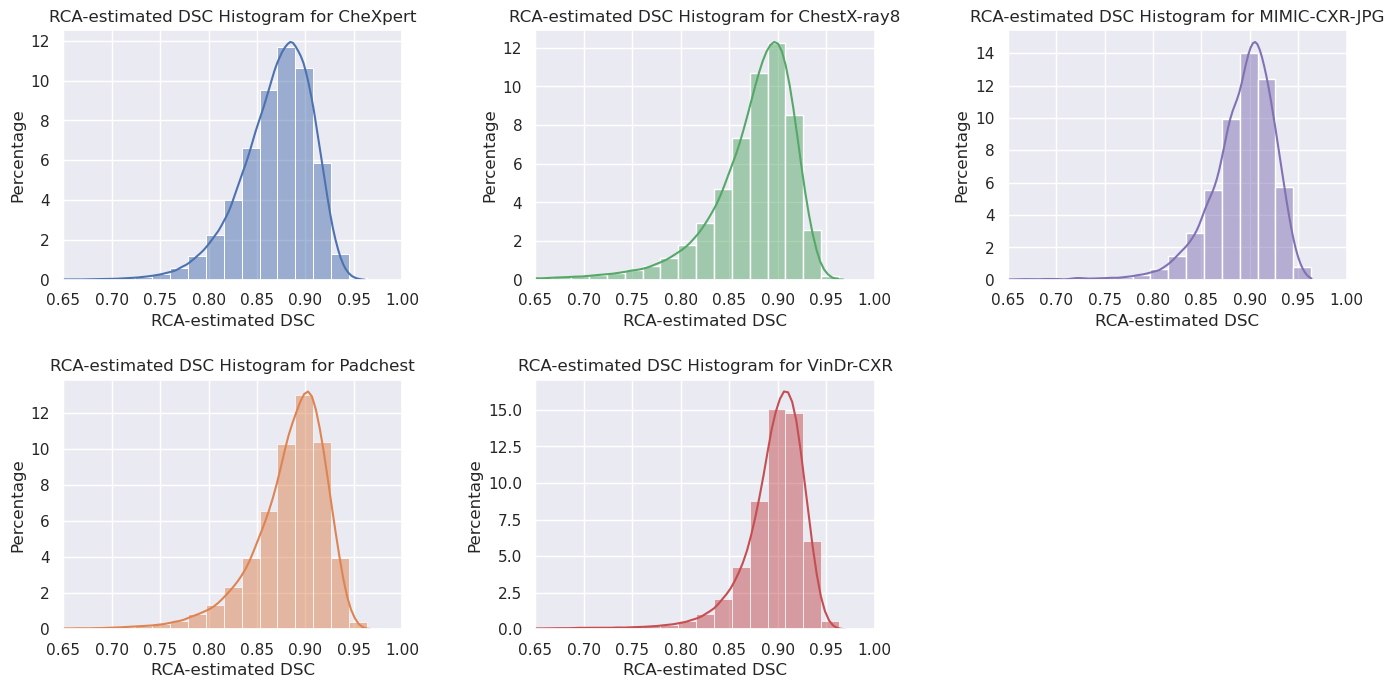

In [10]:
plot_individual_histograms(dfs, names, 'Dice RCA (Max)')

In [ ]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

path = '../../../RCA'

dfs = []
names = []

for f in sorted(os.listdir(path)):
    if '.csv' not in f:
        continue
    df = pd.read_csv(os.path.join(path, f))
    
    dfs.append(df)
    names.append(f)
    
big_df = pd.concat(dfs)

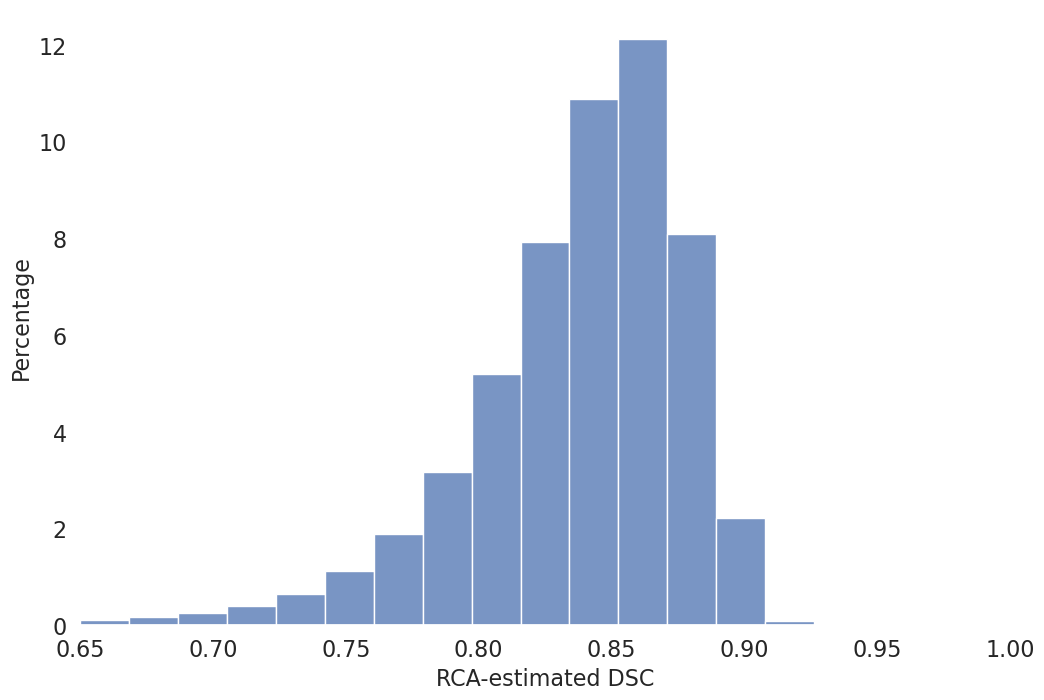

In [ ]:
bins = np.linspace(0.65, 1.0, 20)
values = big_df['Dice RCA (Mean)']

# make all the fonts really big
plt.rcParams.update({'font.size': 22})

# Plot Max histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=values, kde=False, bins=bins, stat='density')
#plt.title("CheXmask RCA-estimated DSC Histogram", fontsize=22)
plt.xlabel("RCA-estimated DSC", fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xlim([0.65, 1.00])

# remove background
plt.gca().set_facecolor('white')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.savefig('histogram_whole_dataset_white.png', dpi=300, bbox_inches='tight')